# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The bank-additional-full dataset represents 17 campaigns that occurred between May 2008 and November 2010

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time

In [209]:
df = pd.read_csv('data1/bank-additional-full.csv', sep = ';')

In [210]:
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



<Axes: >

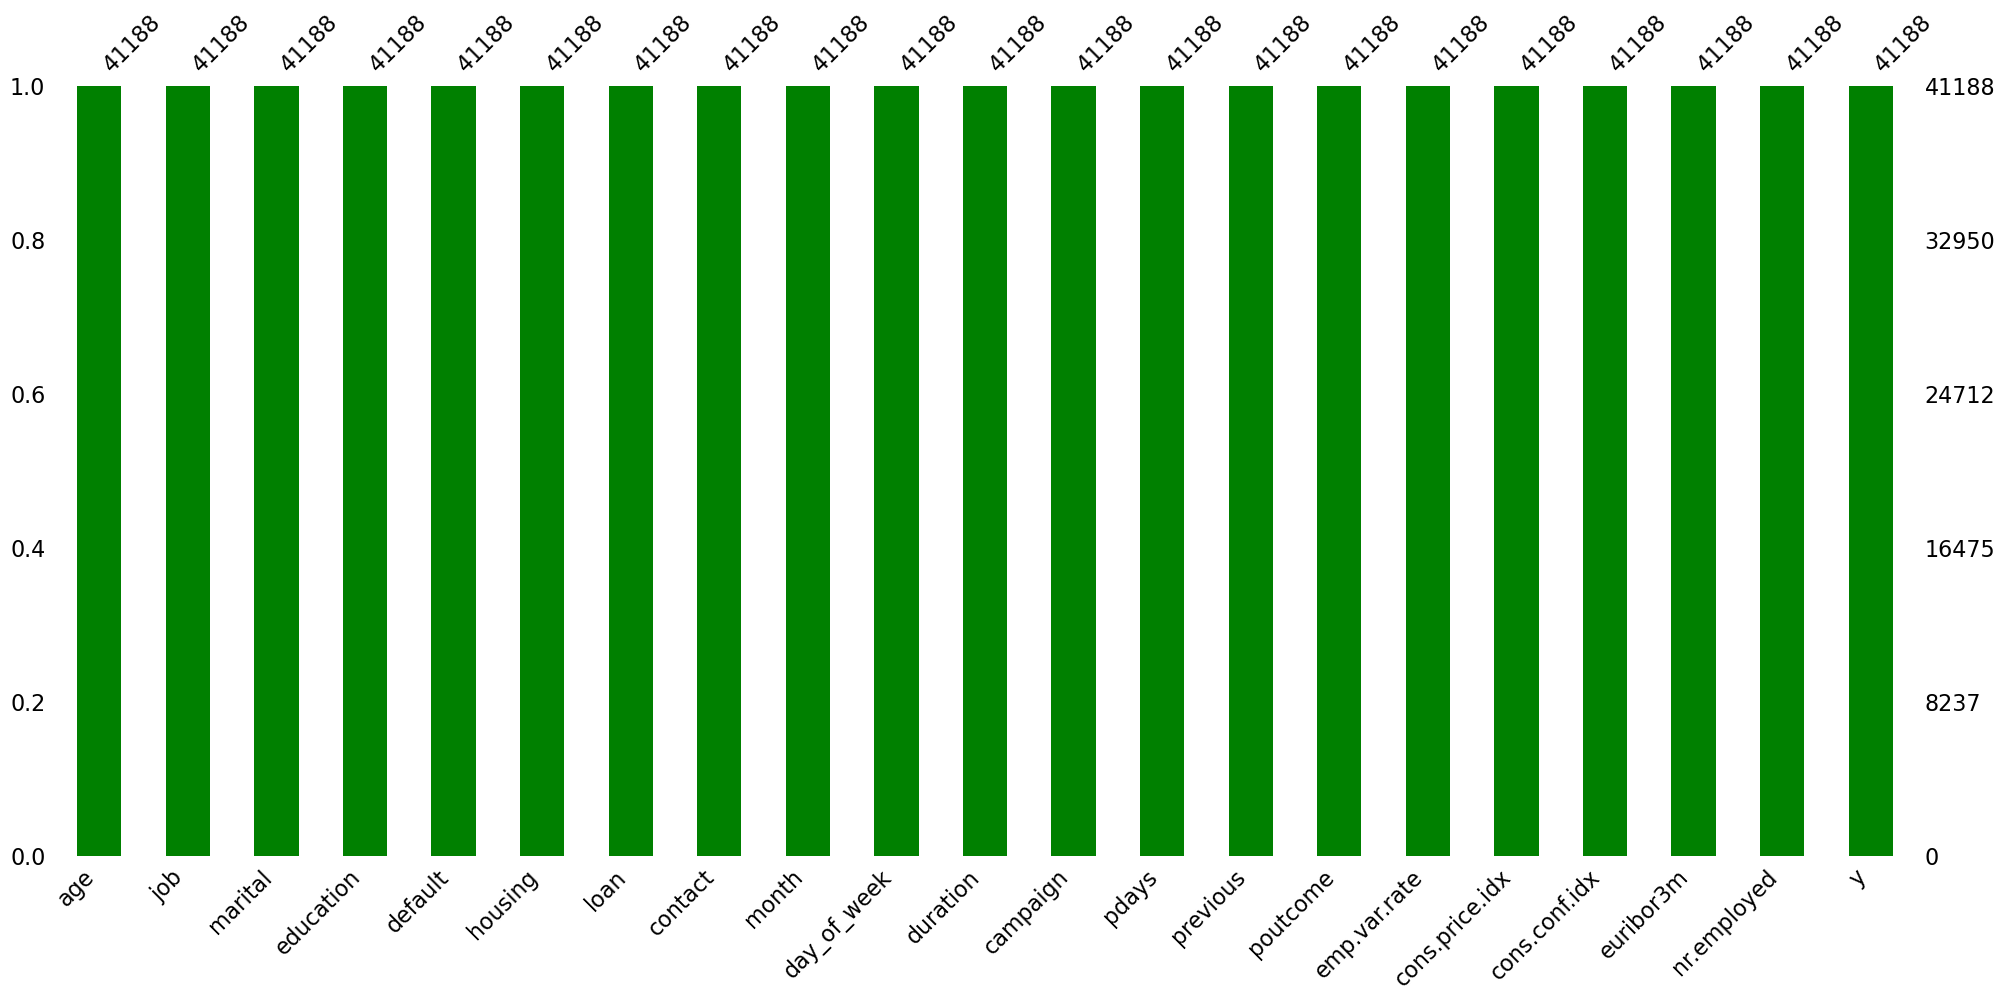

In [211]:
#examine the data lookinf for missing values 
msno.bar(df, color="green")

**Findings**

Dataset does not show any missing values.

In [212]:
#examine the data looking for duplicated values
df_remove_dup = df.drop_duplicates()
removed_rows = df.shape[0] - df_remove_dup.shape[0]
print(f"Total duplicates removed: {removed_rows}")

Total duplicates removed: 12


**Findings**

12 duplicated rows were removed 

In [213]:
df_remove_dup.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Business Obejective**

The business goal is to find a model that can explain success of a contact, i.e. if the client subscribes the deposit. Such model can increase campaign efficiency by identifying the main characteristics that affect success

In [214]:
df_remove_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [215]:
df_remove_dup.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [216]:
# By inspecting the corelation matrix, we'll be able to see which numerical columns
# have co-relation with the success of the the client suscribing to the deposit.
# but firts The target data is converted to 0 and 1 
df_remove_dup['y'] = df_remove_dup['y'].map({'yes': 1, 'no': 0})
df_remove_dup.head(10)

C:\Users\ppachuca\AppData\Local\Temp\2\ipykernel_322308\3642742014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_remove_dup['y'] = df_remove_dup['y'].map({'yes': 1, 'no': 0})


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


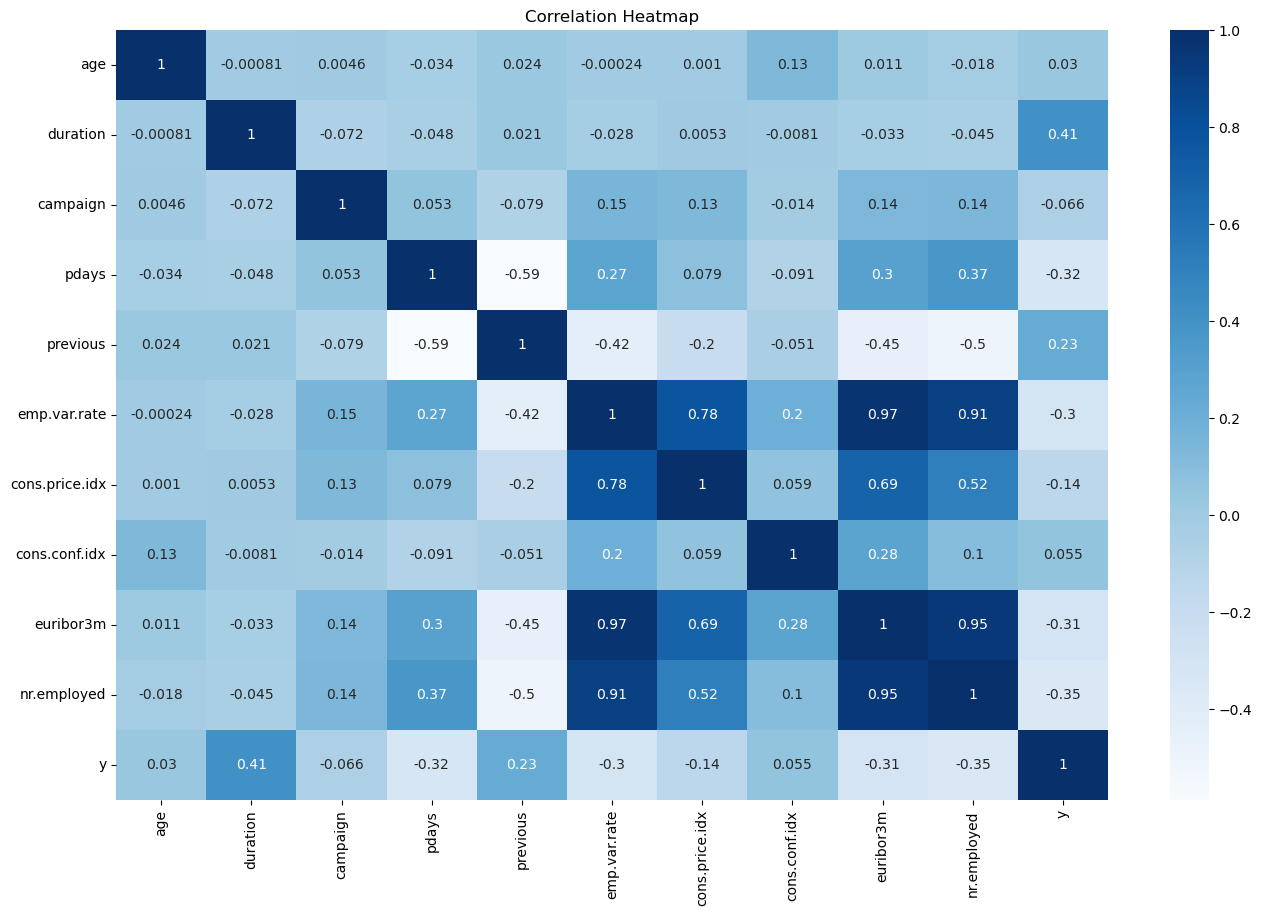

In [217]:
numerical_columns = df_remove_dup.select_dtypes(exclude=object).columns.tolist()

correlation_matrix = df_remove_dup[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

**Findings**

Based on the correlation Matrix, 'duration' has the stronges positive coorelation with the targeted variable and 'previus' has the second larget correlation, it is importnat to notice that "nr.employed", "euribor3m" and "pdays" have significant negative correlation with the targeted variable 

Next step is to take a look at individuals colums to see the data distribution 

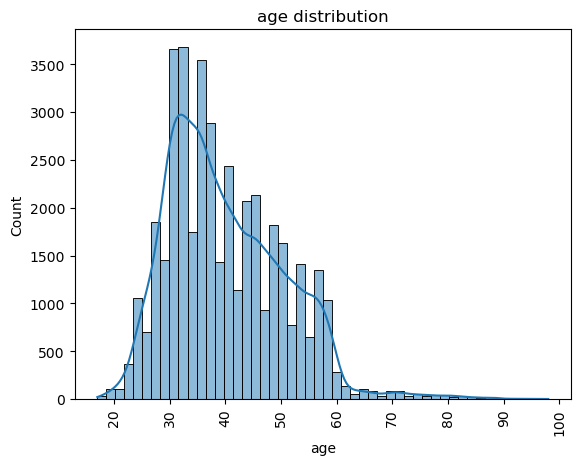

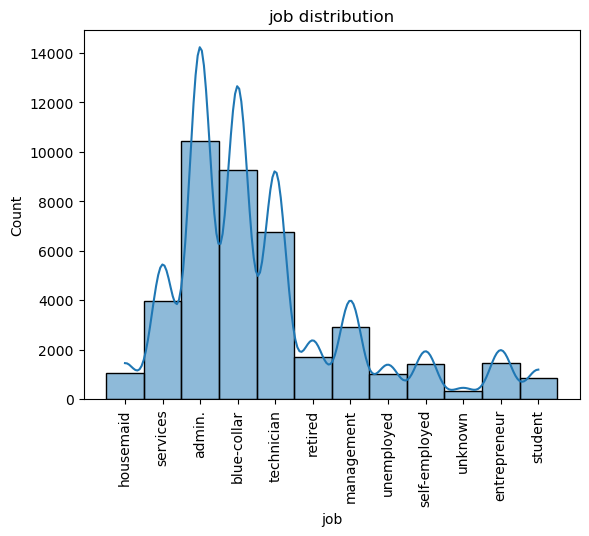

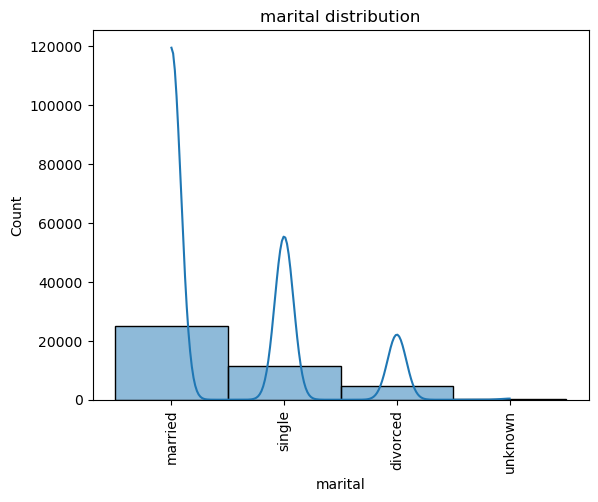

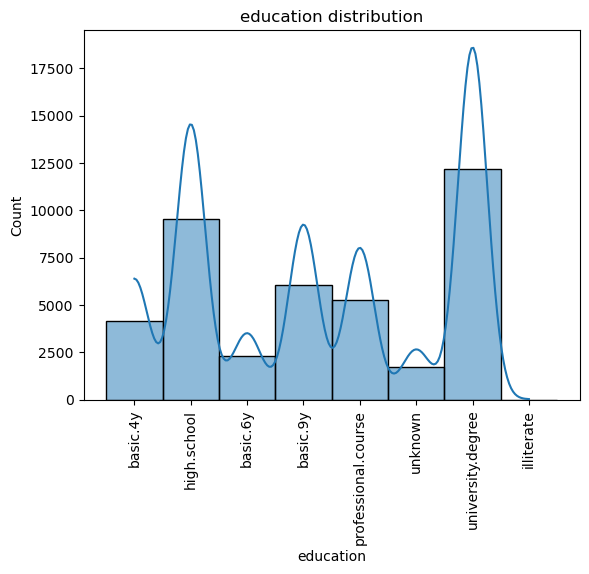

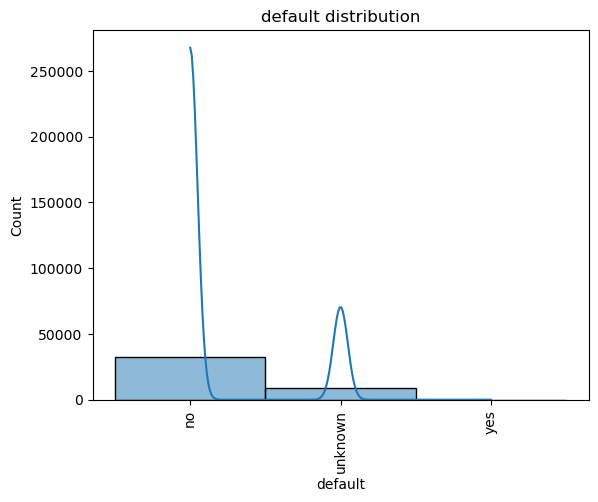

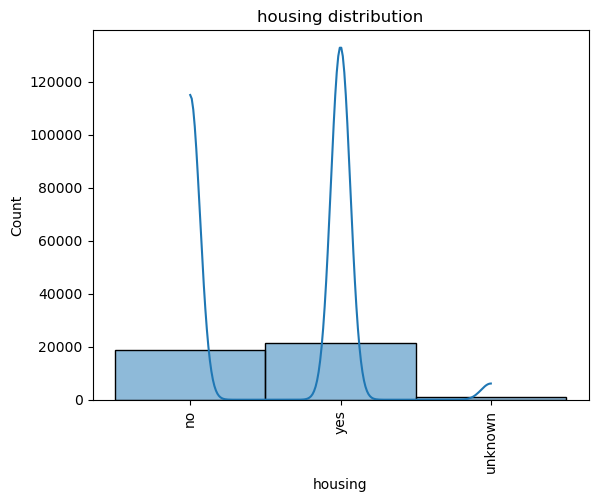

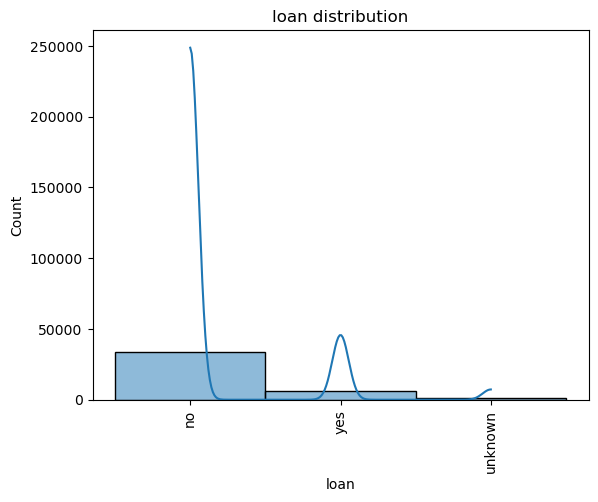

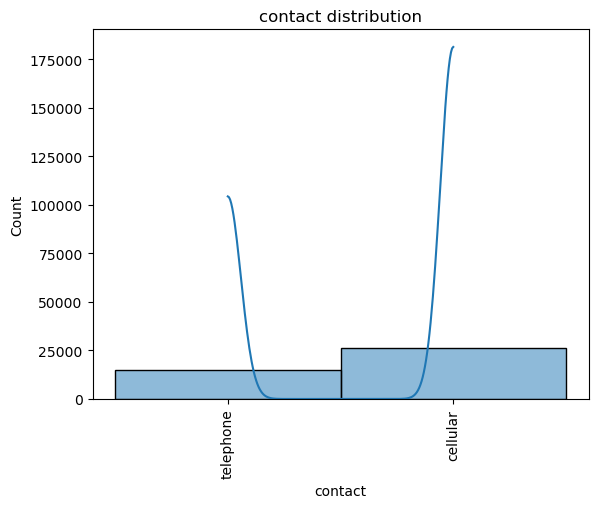

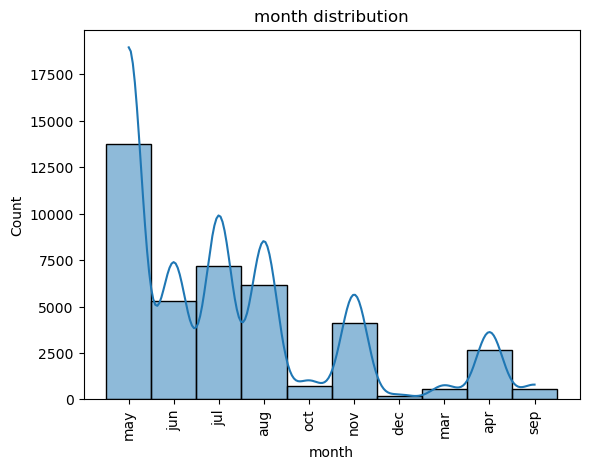

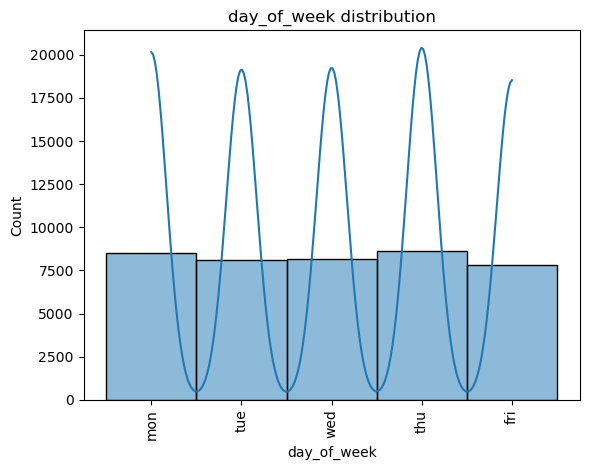

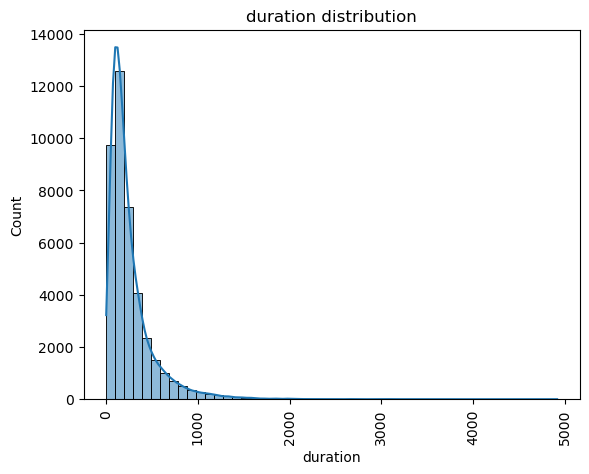

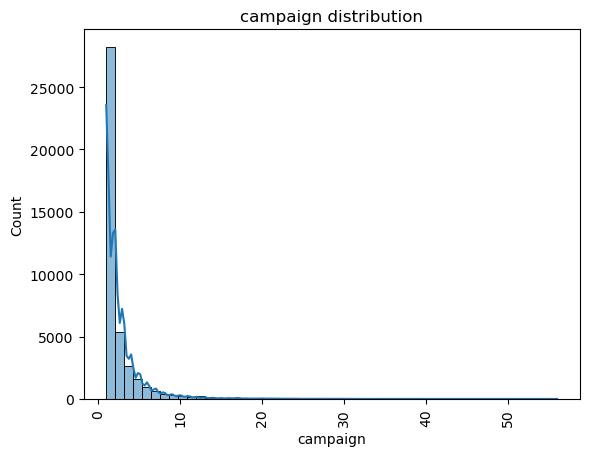

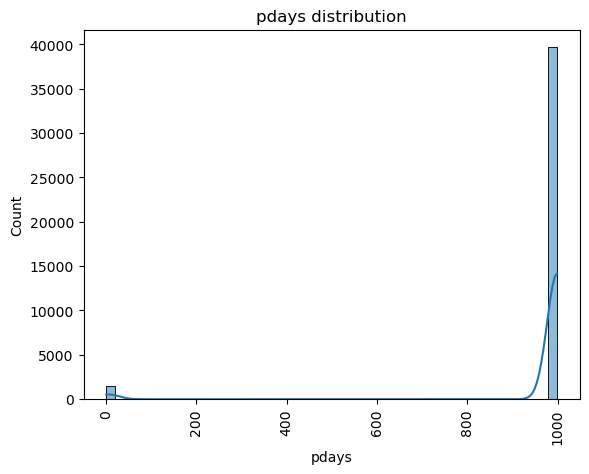

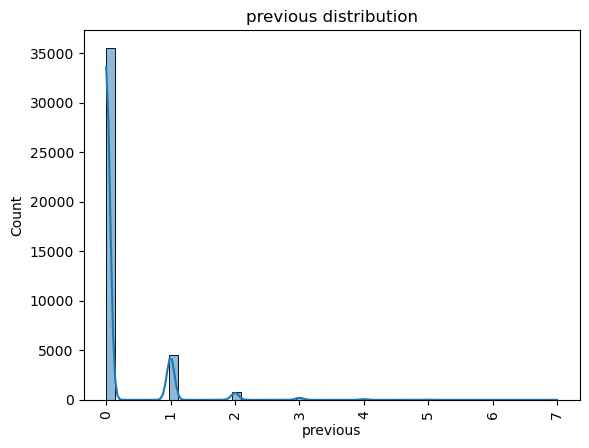

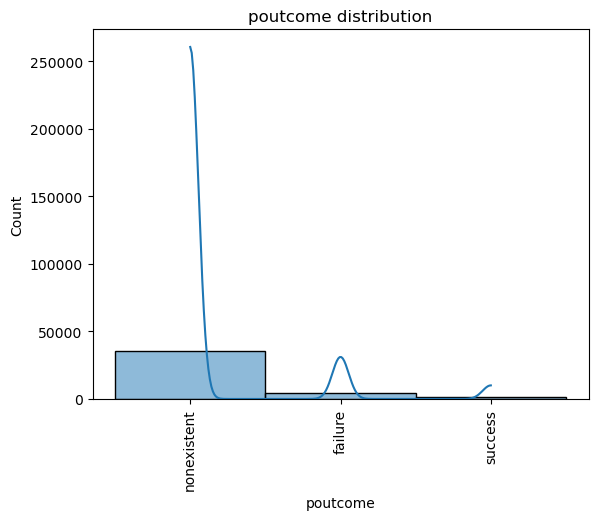

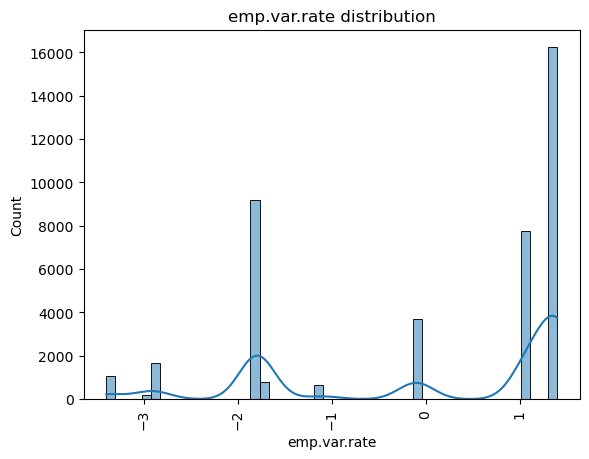

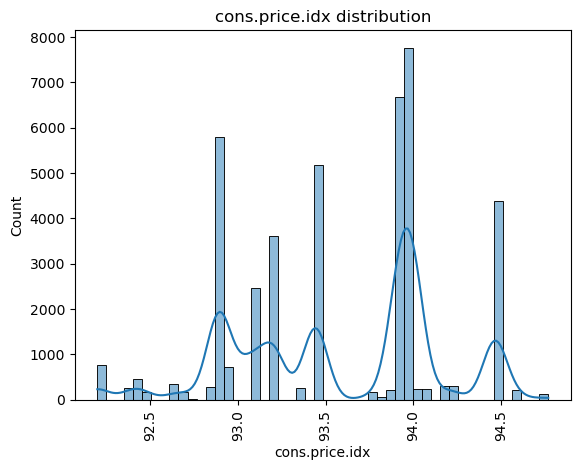

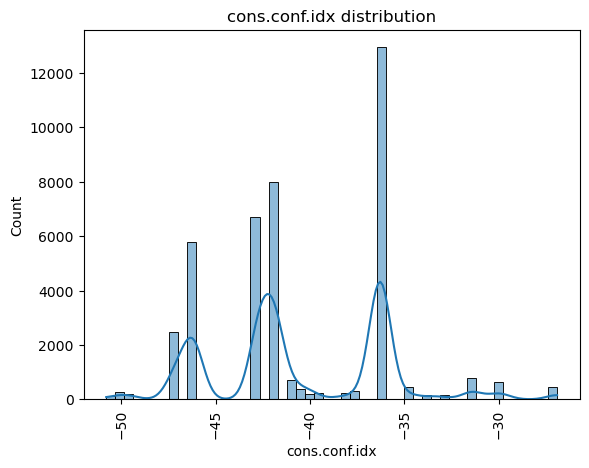

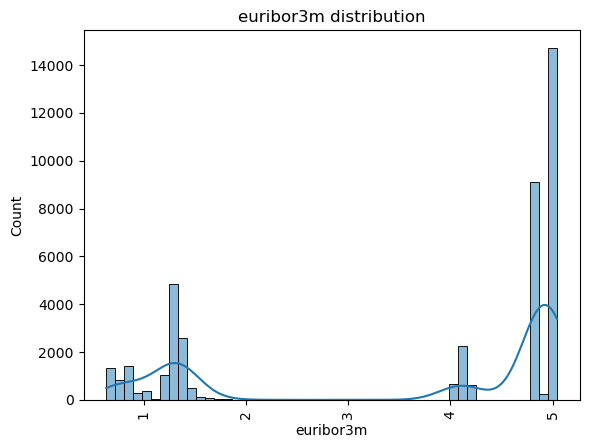

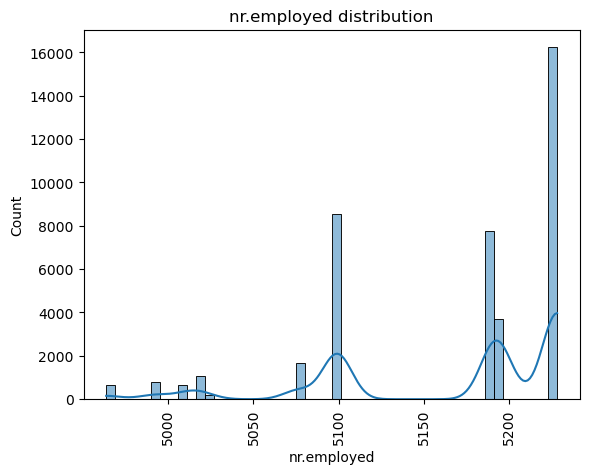

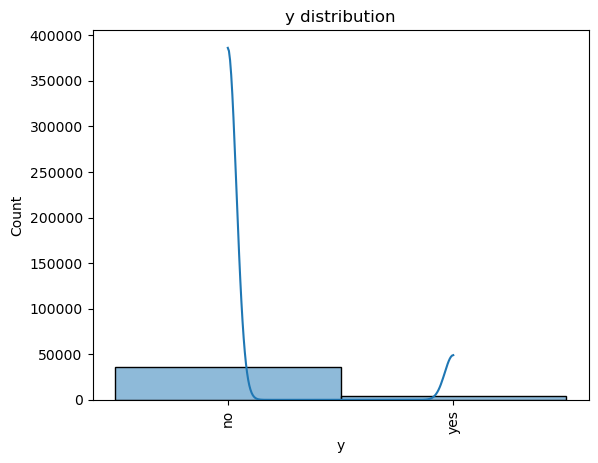

In [218]:
#we create a function to automate teh creation of histograms 
# create a function to visualize the numerical columns
def histogram(column_name):
    sns.histplot(data=df[column_name], bins=50, kde=True)
    plt.title(column_name+' distribution')
    plt.xticks(rotation=90)
    plt.show()
    
for column in df_remove_dup.columns:
    histogram(column)  # Calling the histogram function defined above

**Findings**

Based on the above plots, the data is distributed for most columns except for duration, campaign, pdays and previous. We are going to keep this records intact for now until further analysis.

*Next Step*

We will now review the relationship of the outcome y to all the categorical columns

In [219]:
categorical_columns = df_remove_dup.select_dtypes(include=object).columns.tolist()
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

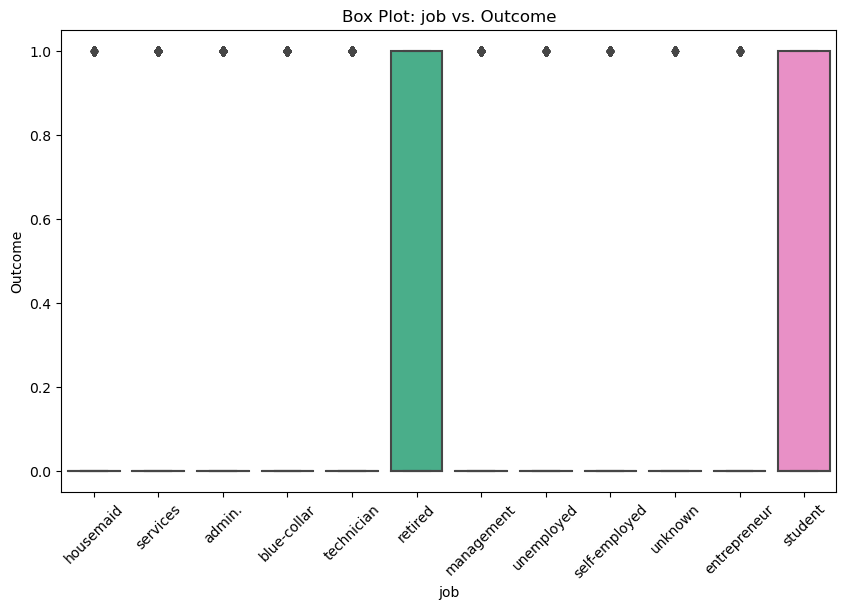

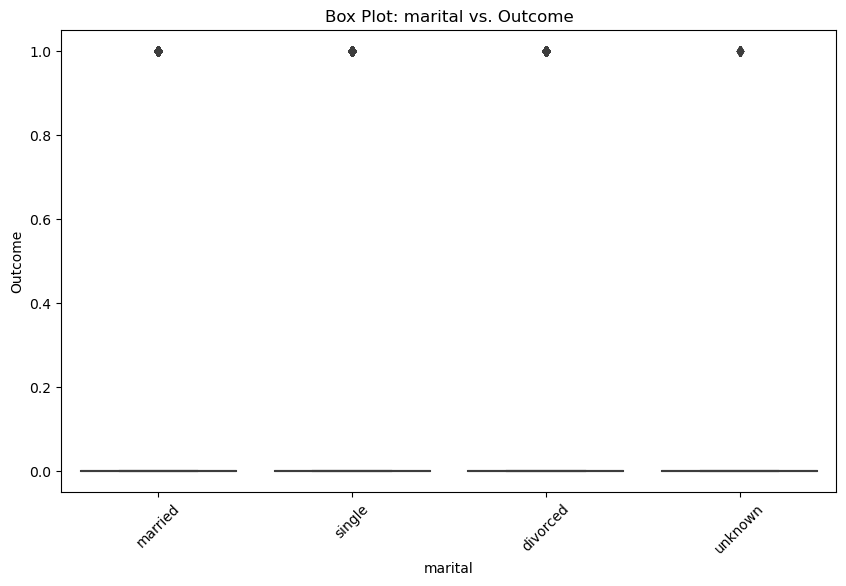

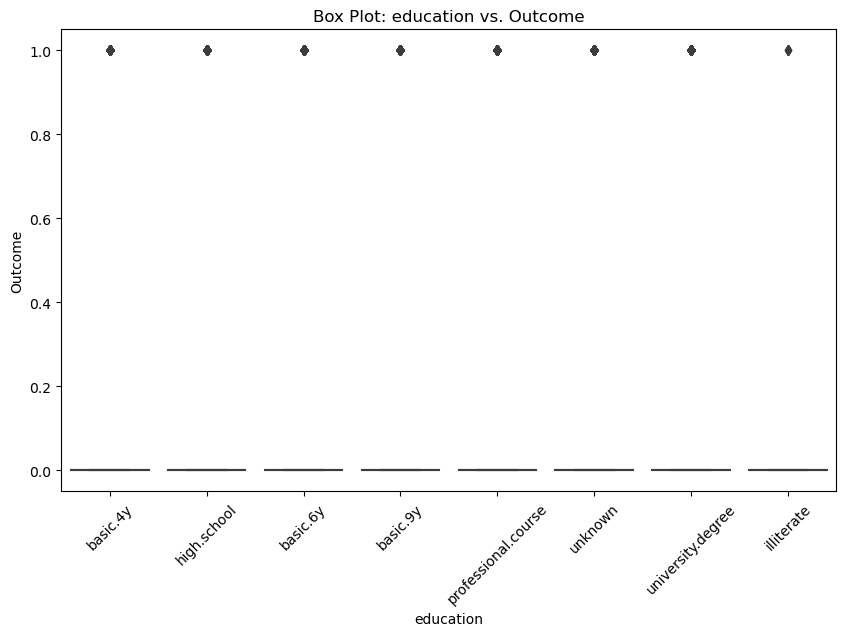

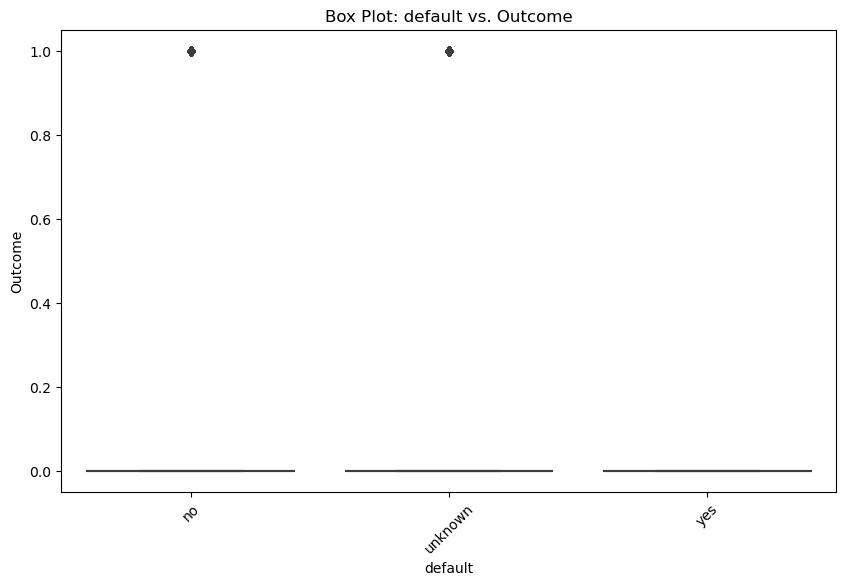

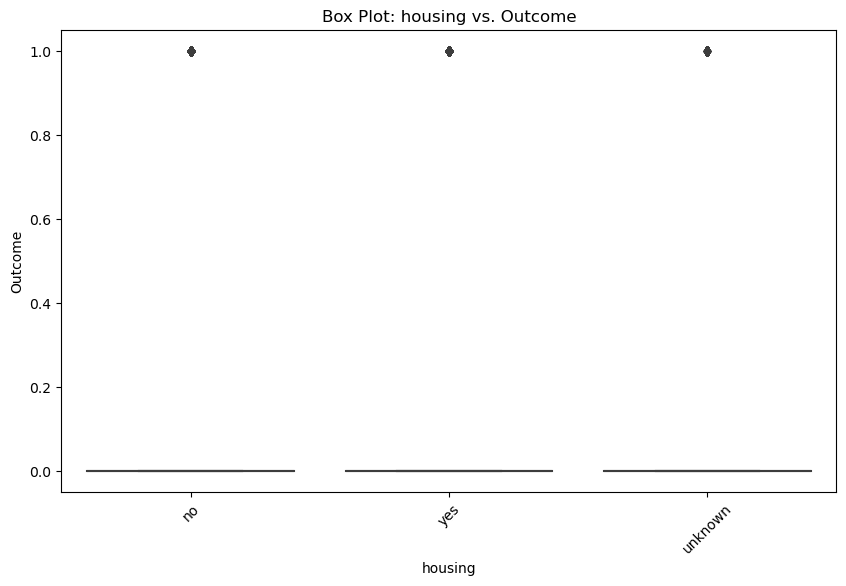

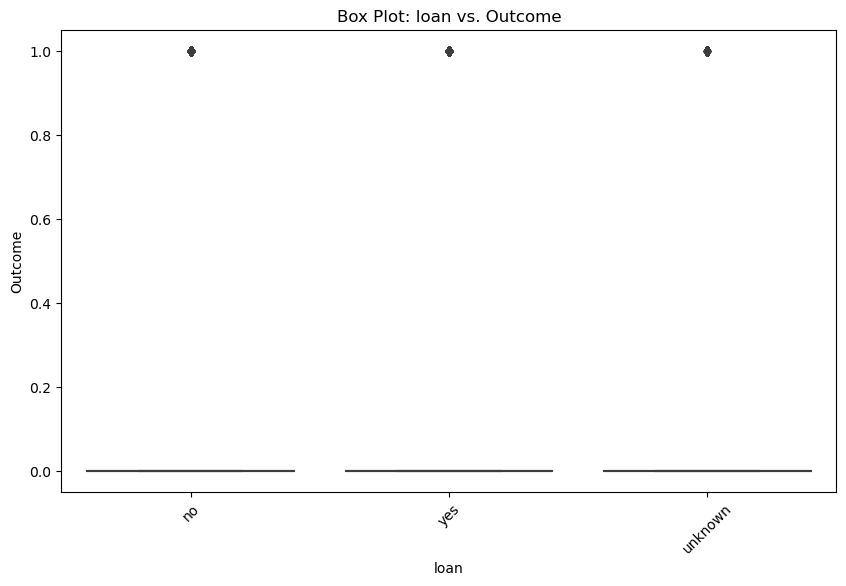

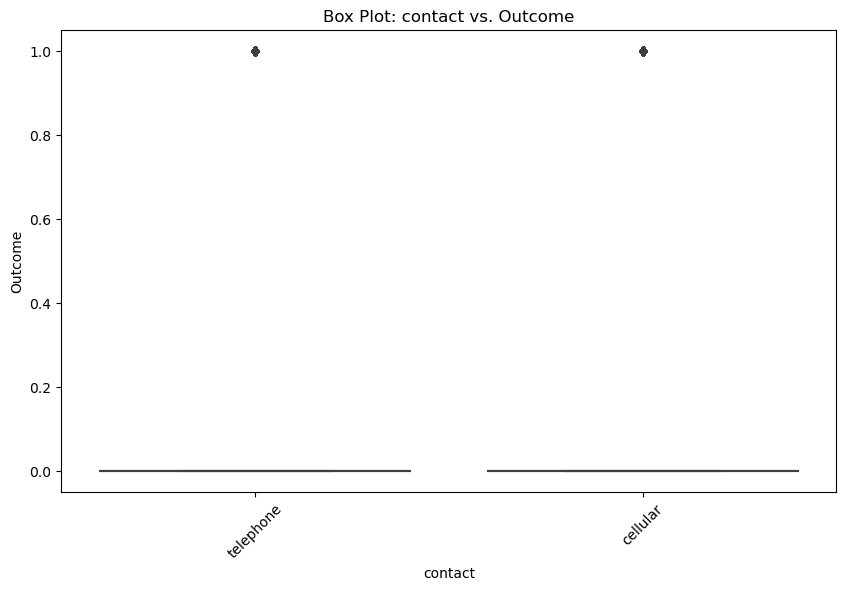

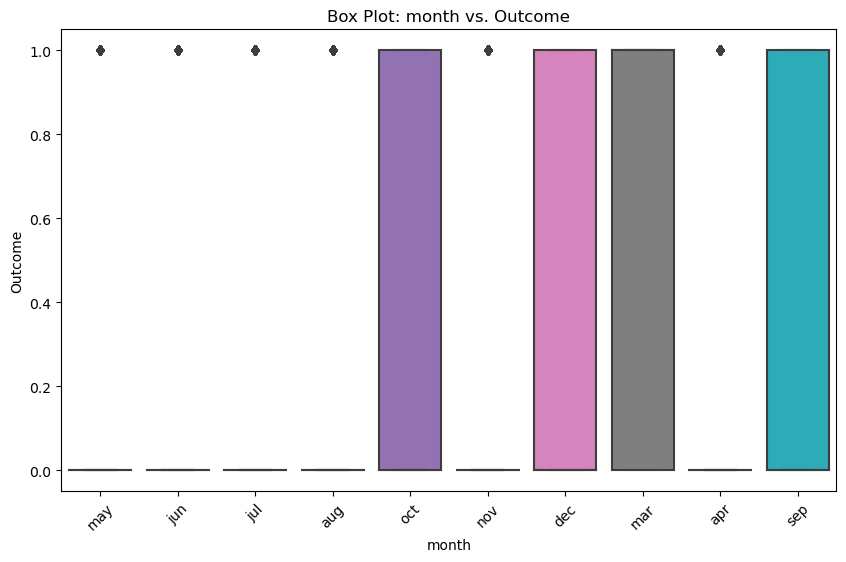

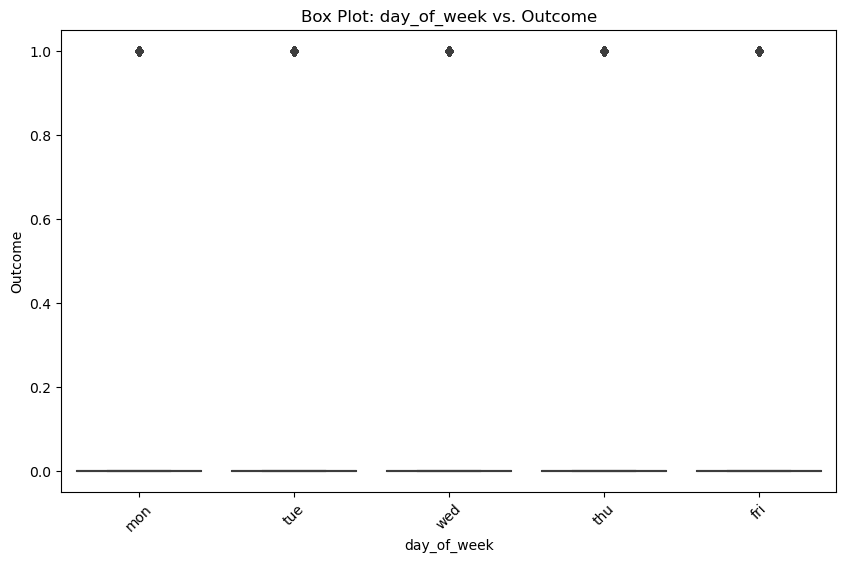

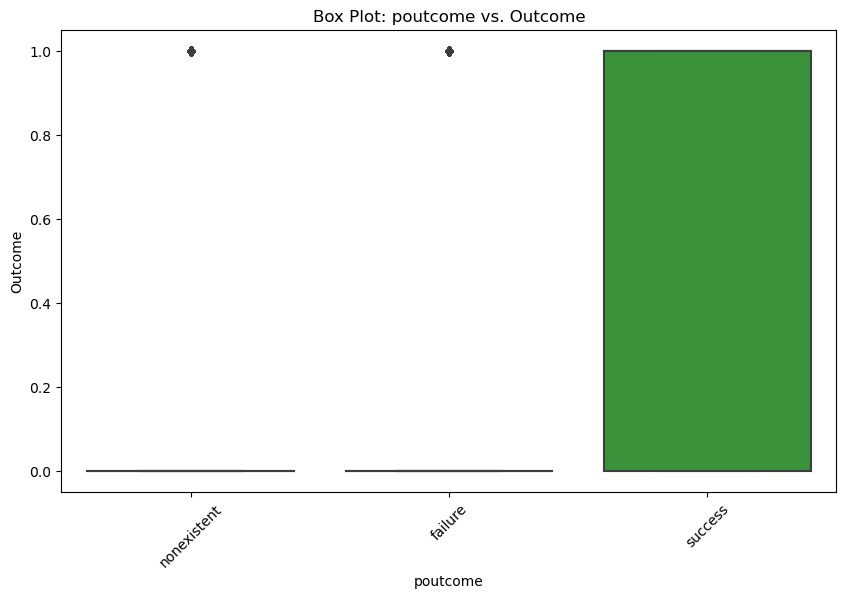

In [220]:


# Create a box plot between a categorical column and price
def box_plot(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column_name, y='y', data=df)
    plt.title(f'Box Plot: {column_name} vs. Outcome')
    plt.xlabel(column_name)
    plt.ylabel('Outcome')
    plt.xticks(rotation=45)
    plt.show()


for column in categorical_columns:
    box_plot(df_remove_dup, column)

**Findings**

Based on the Box plots, only Job, Month and POutcome are the only three categorical features that have direct relationship with Outcome of user subscribing to bank's cd.

Next Steps
We are now going to remove any of the categorical columns from the dataset which doesn't have any impact on the targeted variable

In [221]:
#Removing columns which are not required for the model

df_clean = df_remove_dup.drop(['marital', 'education','default','housing','loan','contact', 'day_of_week'], axis=1)

In [222]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   month           41176 non-null  object 
 3   duration        41176 non-null  int64  
 4   campaign        41176 non-null  int64  
 5   pdays           41176 non-null  int64  
 6   previous        41176 non-null  int64  
 7   poutcome        41176 non-null  object 
 8   emp.var.rate    41176 non-null  float64
 9   cons.price.idx  41176 non-null  float64
 10  cons.conf.idx   41176 non-null  float64
 11  euribor3m       41176 non-null  float64
 12  nr.employed     41176 non-null  float64
 13  y               41176 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 4.7+ MB


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [223]:
#Label Encoding all columns with less than 12 unique values
#Initialize LabelEncoder
from sklearn.calibration import LabelEncoder


le = LabelEncoder()

# Select columns with 10 or less unique values
columns_to_encode = [col for col in df_clean.columns if df_clean[col].nunique() <= 15 and df_clean[col].dtype == 'object']

# Apply LabelEncoder to these columns
for column in columns_to_encode:
    df_clean[column] = le.fit_transform(df_clean[column])
    
df_clean.head(10)

,age,job,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,6,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,6,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,6,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,6,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,6,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,6,198,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,6,139,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,6,217,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,6,380,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,6,50,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [224]:
# Define X and y
X = df_clean.drop('y', axis=1).values
y = df_clean['y'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [225]:
dummy_clf = DummyClassifier().fit(X_train_std, y_train)
baseline_score = dummy_clf.score(X_test_std , y_test)
print(baseline_score)

0.8821029626032054


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [226]:
lr = LogisticRegression().fit(X_train_std, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [227]:
y_pred = lr.predict(X_test_std)
y_score = lr.predict_proba(X_test_std)[:,1]
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
if accuracy > baseline_score:
    print("Model's accuracy is better than the baseline performance.")
else:
    print("Model's accuracy is not better than the baseline performance.")

Accuracy: 90.23%
Model's accuracy is better than the baseline performance.


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [230]:
# Model Array 
models = [
    ('SVM', SVC(probability=True)),
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
   
]

SVM:


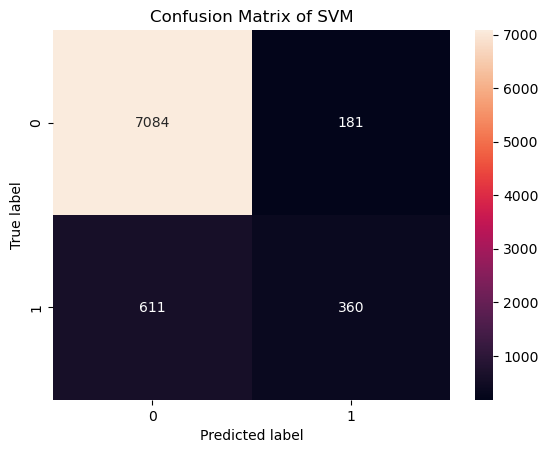

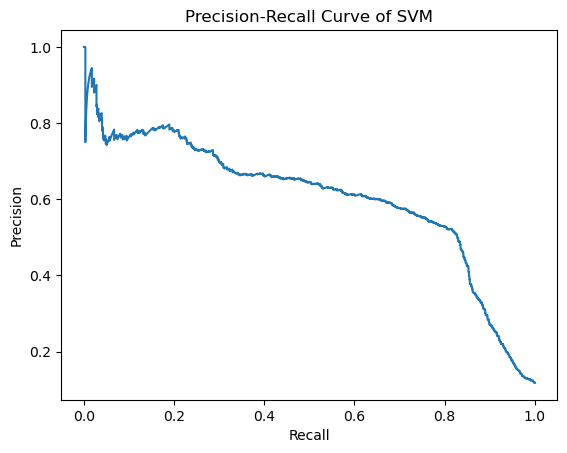

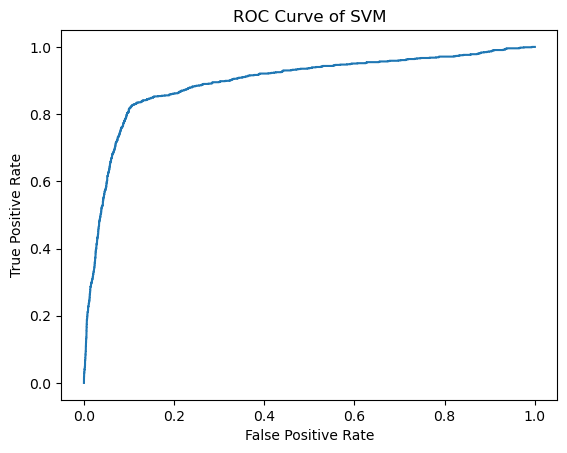

Logistic Regression:


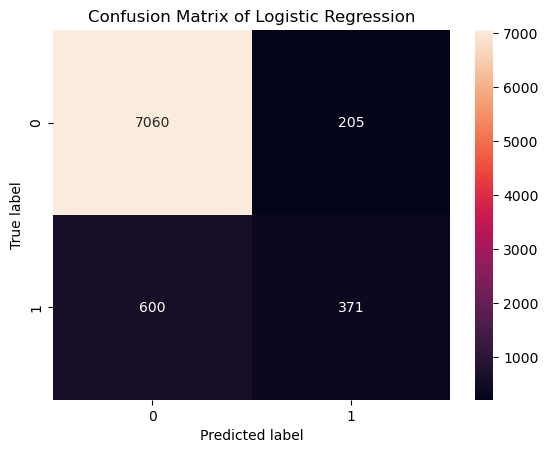

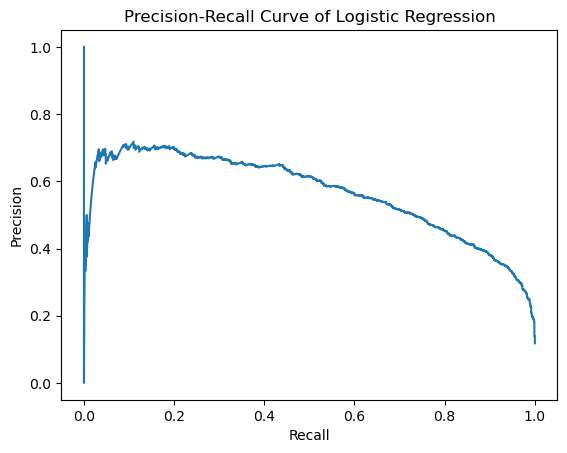

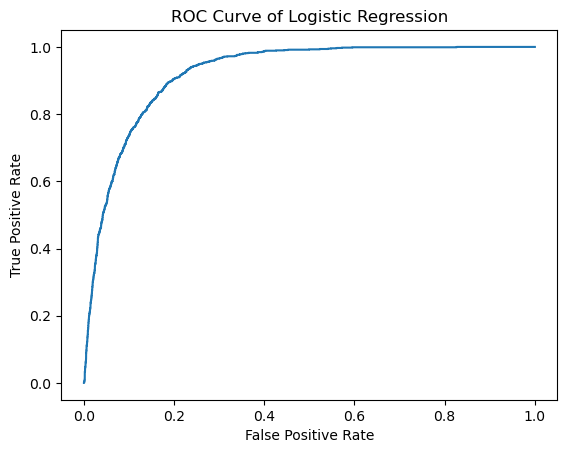

KNN:


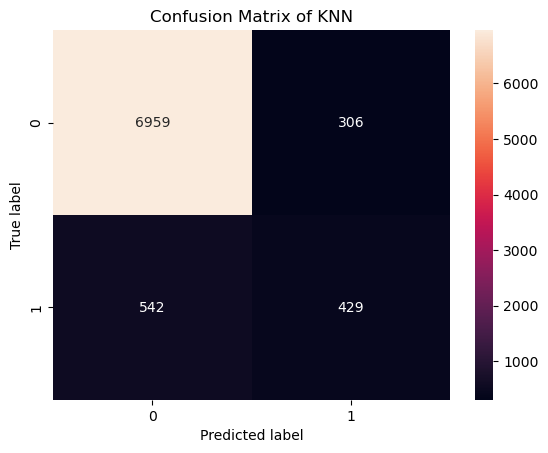

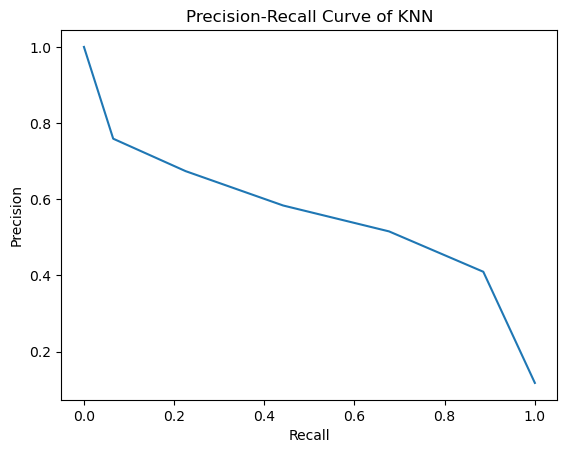

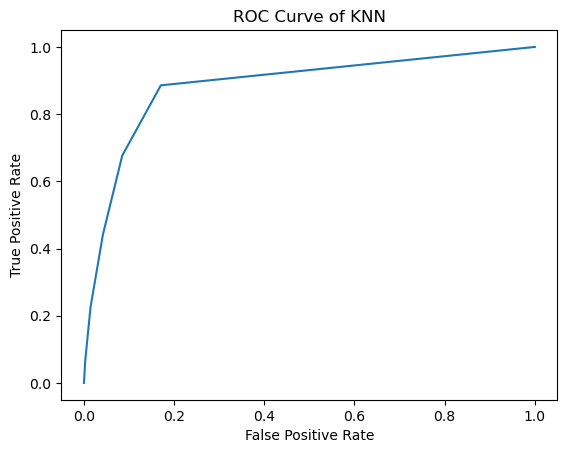

Decision Tree:


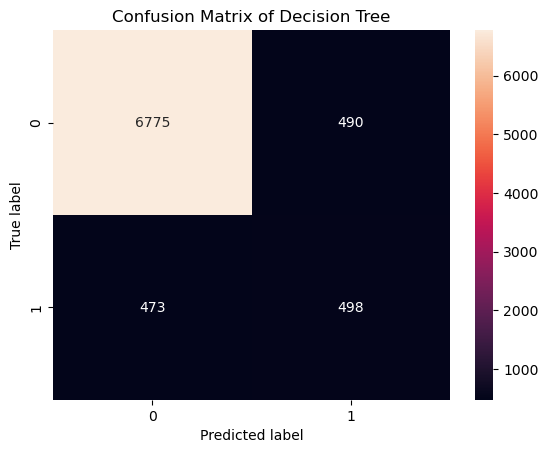

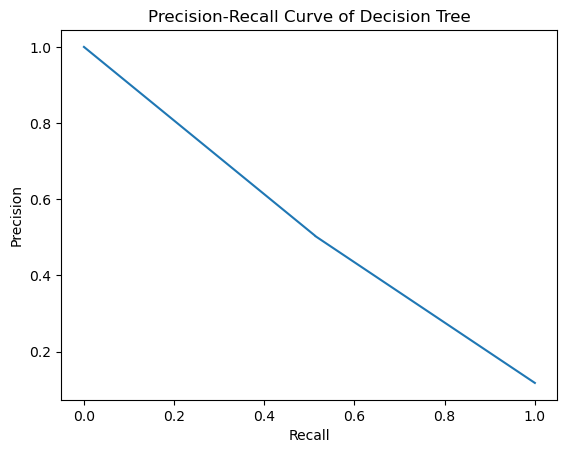

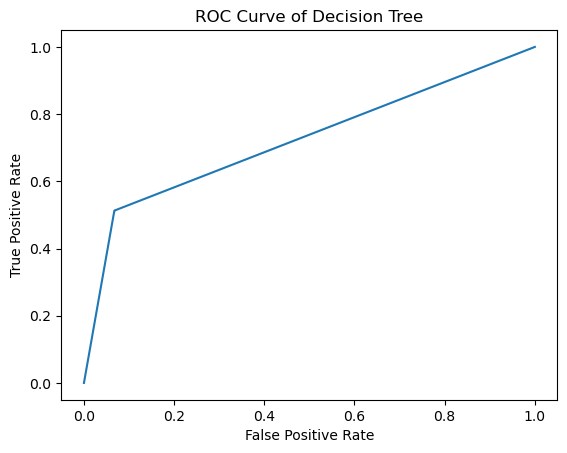

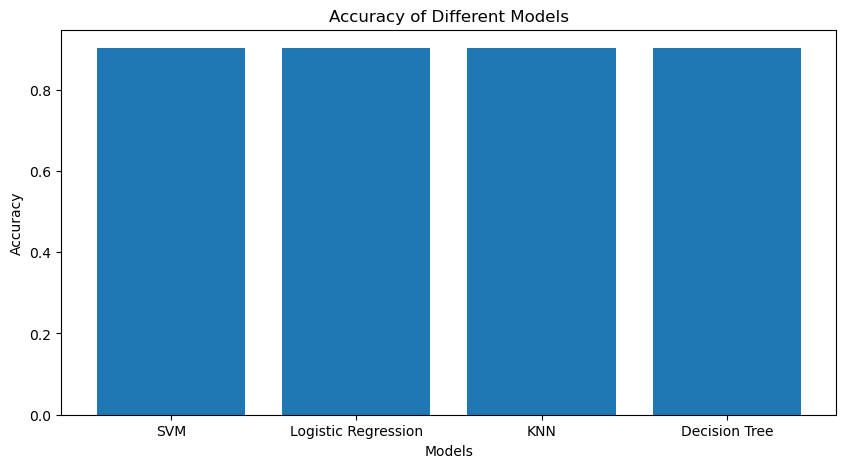

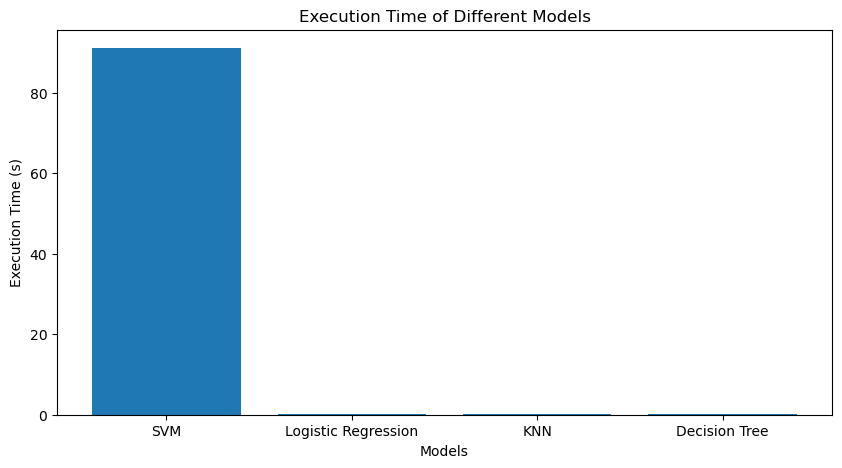

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,SVM,91.108934,0.916272,0.903837,0.793016,0.672919,0.711625,0.672919
1,Logistic Regression,0.062499,0.911536,0.902258,0.782884,0.676931,0.712851,0.676931
2,KNN,0.156861,0.932848,0.897037,0.755708,0.699846,0.722751,0.699846
3,Decision Tree,0.148891,0.999939,0.883074,0.719395,0.722713,0.721034,0.722713


In [231]:
model_names = []
accuracies = []
execution_times = []
results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
index = 0
# Train each model, make predictions and evaluate
for name, model in models:
    start_time = time.time()
    model.fit(X_train_std, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    y_pred = model.predict(X_test_std)
    y_score = model.predict_proba(X_test_std)[:,1]
    train_accuracy = accuracy_score(y_train, model.predict(X_train_std))
    test_accuracy = accuracy_score(y_test, y_pred)
   
 

    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1score = f1_score(y_test, y_pred, average="macro")
    rocauc = roc_auc_score(y_test, y_pred)

    results.loc[index] = [name, execution_time, train_accuracy, test_accuracy, precision, recall, f1score, rocauc]
    
    
    # Increment the index
    index += 1

    print(f'{name}:')
    
    # Plot Confusion Matrix
    plt.figure()  
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix of {name}')
    plt.show()
        
    # Calculate precision, recall
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    
    # Plot Precision-Recall curve
    plt.figure()  # Create a new figure
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')    
    plt.title(f'Precision-Recall Curve of {name}')
    plt.show()
    
    # Calculate FPR, TPR
    fpr, tpr, _ = roc_curve(y_test, y_score)
    
    # Plot ROC curve
    plt.figure()  # Create a new figure
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve of {name}')
    plt.show()
    
 
    # Store the model name and accuracy
    model_names.append(name)
    accuracies.append(accuracy)
    execution_times.append(execution_time)


# Plot accuracy of different models
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

# Plot execution time of different models
plt.figure(figsize=(10, 5))
plt.bar(model_names, execution_times)
plt.xlabel('Models')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Different Models')
plt.show()

# Review results in dataframe
results

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [232]:
models_params = {
     SVC(probability=True): {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10]
    },
    LogisticRegression(): {
        'penalty': [ 'l2'],
        'C': [0.1, 1, 10]
    },
    KNeighborsClassifier(): {
        
        'n_neighbors': [3, 5, 7, 9]
    },
    DecisionTreeClassifier(): {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 5, 10]
    }
    
}

In [233]:
#Apply GridSearchCV for each modelt

improved_results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
index = 0
for model, params in models_params.items():
    grid_search = GridSearchCV(model, params, cv=3)
    start_time = time.time()
    grid_search.fit(X_train_std, y_train)
    end_time = time.time()
    execution_time = end_time - start_time


    y_pred = grid_search.predict(X_test_std)  
    y_score = grid_search.predict_proba(X_test_std)[:,1]  
    train_accuracy = accuracy_score(y_train, grid_search.predict(X_train_std))  
    test_accuracy = accuracy_score(y_test, y_pred)


    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1score = f1_score(y_test, y_pred, average="macro")
    rocauc = roc_auc_score(y_test, y_pred)

    improved_results.loc[index] = [model, execution_time, train_accuracy, test_accuracy, precision, recall, f1score, rocauc]

    # Increment the index
    index += 1
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best score for {model.__class__.__name__}: {grid_search.best_score_}")

# Review results in dataframe
improved_results

Best parameters for SVC: {'C': 1, 'kernel': 'rbf'}
Best score for SVC: 0.910200364298725
Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2'}
Best score for LogisticRegression: 0.9112325440194292
Best parameters for KNeighborsClassifier: {'n_neighbors': 9}
Best score for KNeighborsClassifier: 0.9081663630843959
Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 5}
Best score for DecisionTreeClassifier: 0.9141772920461445


,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,SVC(probability=True),1302.210475,0.916272,0.903837,0.793016,0.672919,0.711625,0.672919
1,LogisticRegression(),0.461266,0.910959,0.903230,0.786617,0.679266,0.715704,0.679266
2,KNeighborsClassifier(),11.528258,0.924287,0.899830,0.765601,0.699645,0.725854,0.699645
3,DecisionTreeClassifier(),0.861508,0.918063,0.912093,0.804534,0.729794,0.759798,0.729794


<Axes: >

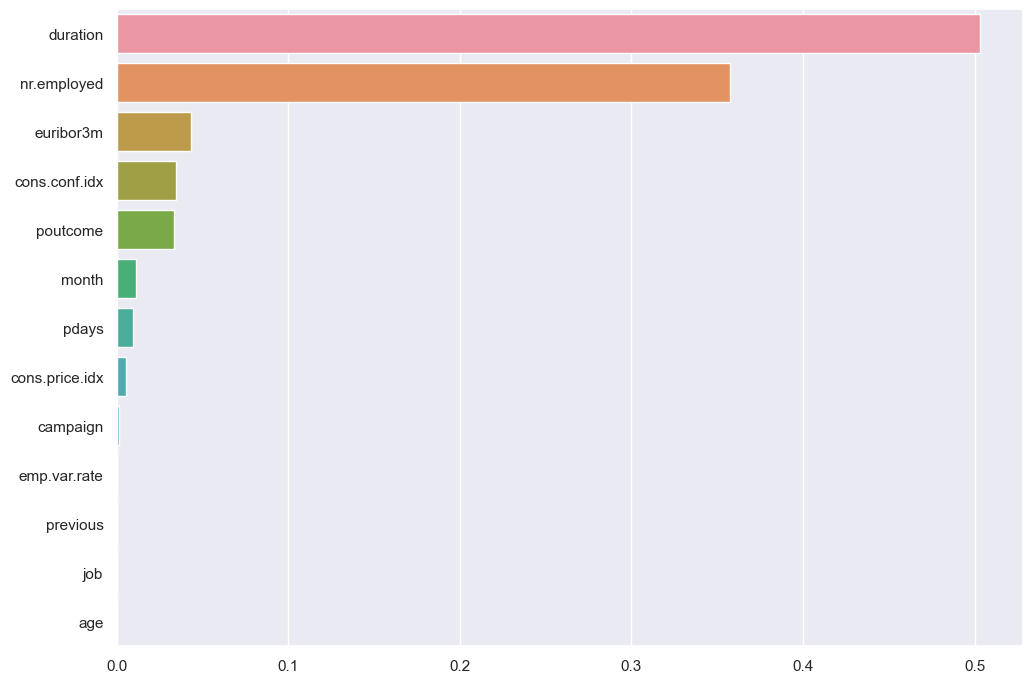

In [255]:
final_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5).fit(X_train_std, y_train)
feature_importances = final_model.feature_importances_


# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = df_clean.columns[sorted_indices]

sorted_importances = feature_importances[sorted_indices]


# # Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = sorted_importances, y = sorted_feature_names)

##### Questions